✅ Using device: mps


Model is not optimized for inference. Latency may be higher than expected. You can optimize the model for inference by calling model.optimize_for_inference().


Loading pretrain weights


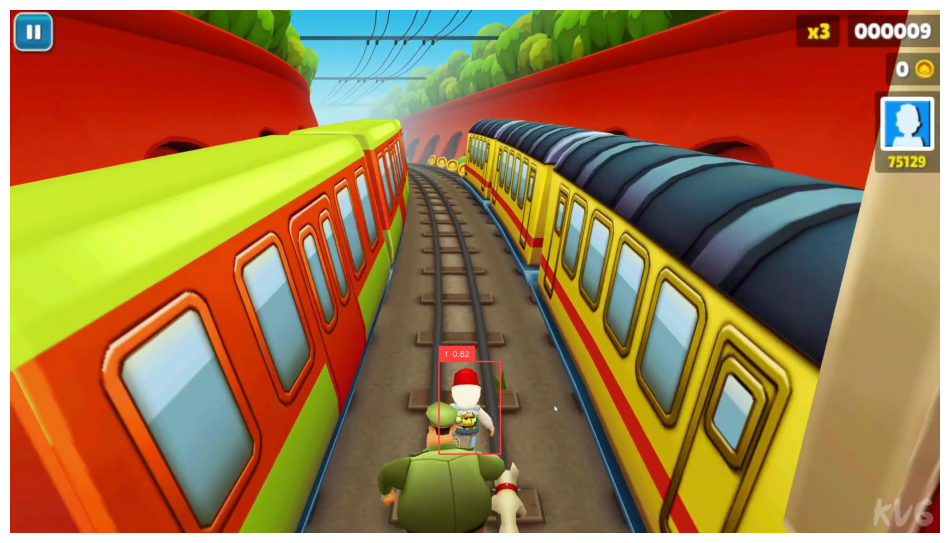

Inference time: 1164.43 ms


In [5]:
import os
from rfdetr import RFDETRBase
from PIL import Image
import supervision as sv
import time
import torch

def cycle2(j,i):

    device = "mps" if torch.backends.mps.is_available() else "cpu"
    print(f"✅ Using device: {device}")

    start = time.time()
    # point 'weightsjake.pt' at your locally-saved checkpoint
    weights_path = os.path.expanduser("~/downloads/weightsjake.pt")
    
    # instantiate with your custom weights
    model = RFDETRBase(
      pretrain_weights=weights_path,
      num_classes=3,            # ← match your checkpoint
    )
    
    # now do your usual inference…
    image = Image.open(os.path.expanduser(f"~/SubwaySurfers/train_screenshots/frame_00{j}{i}.jpg"))
    detections = model.predict(image, threshold=0.5)
    
    # visualize
    annot = image.copy()
    annot = sv.BoxAnnotator().annotate(annot, detections)
    annot = sv.LabelAnnotator().annotate(annot, detections,
                                         [f"{cid} {conf:.2f}" for cid, conf in zip(detections.class_id, detections.confidence)])
    sv.plot_image(annot)
    end = time.time()
    
    print(f"Inference time: {(end - start) * 1000:.2f} ms")


#Test for ranges
for i in range(1):
    for j in range(1):
        cycle2(j, i)


Loading pretrain weights


Model is not optimized for inference. Latency may be higher than expected. You can optimize the model for inference by calling model.optimize_for_inference().


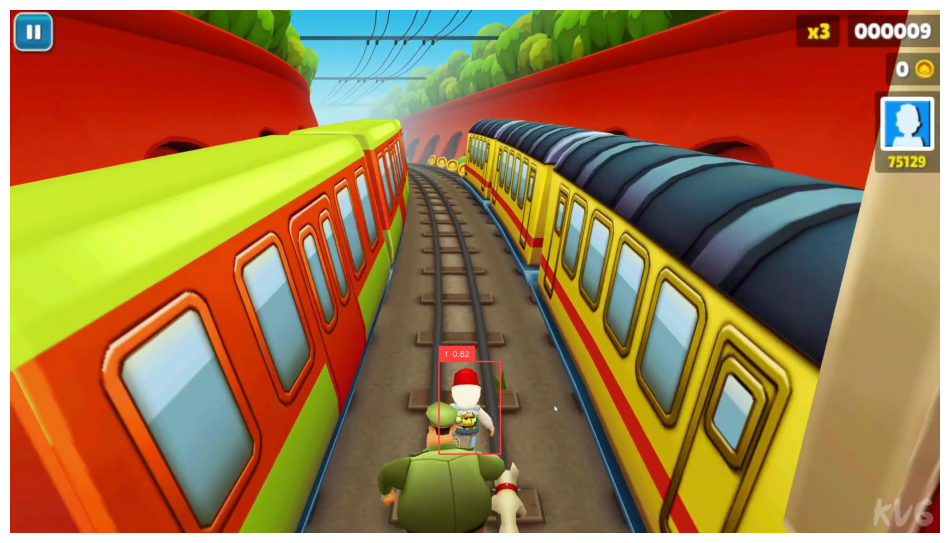

Inference time: 349.59 ms


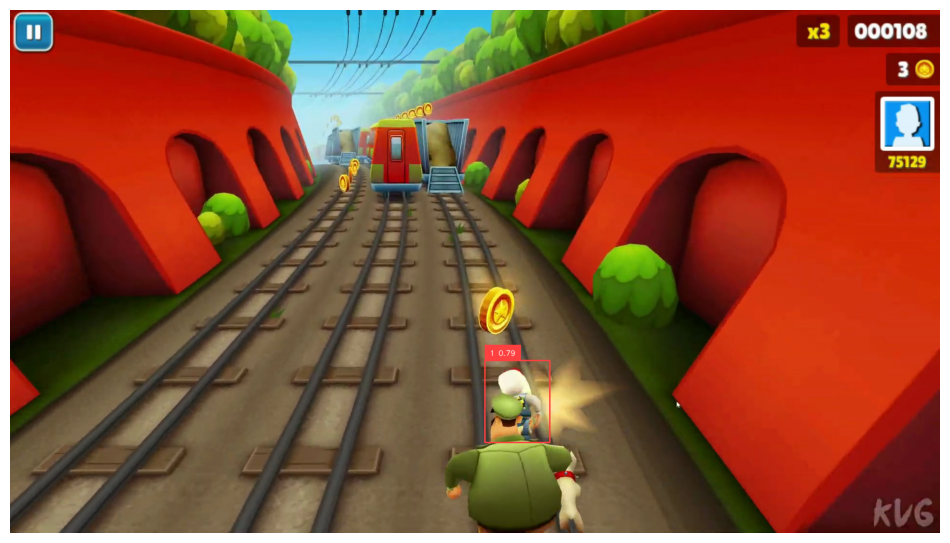

Inference time: 225.91 ms


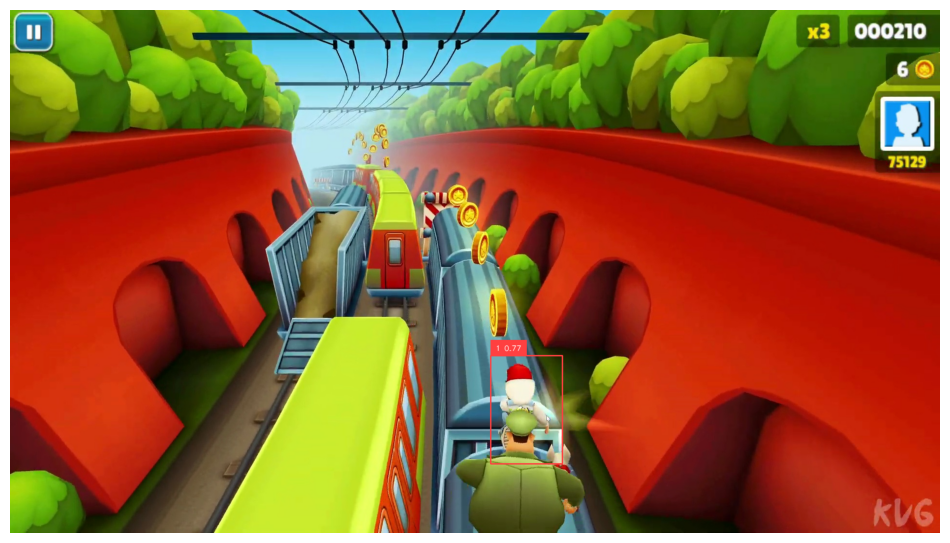

Inference time: 255.13 ms


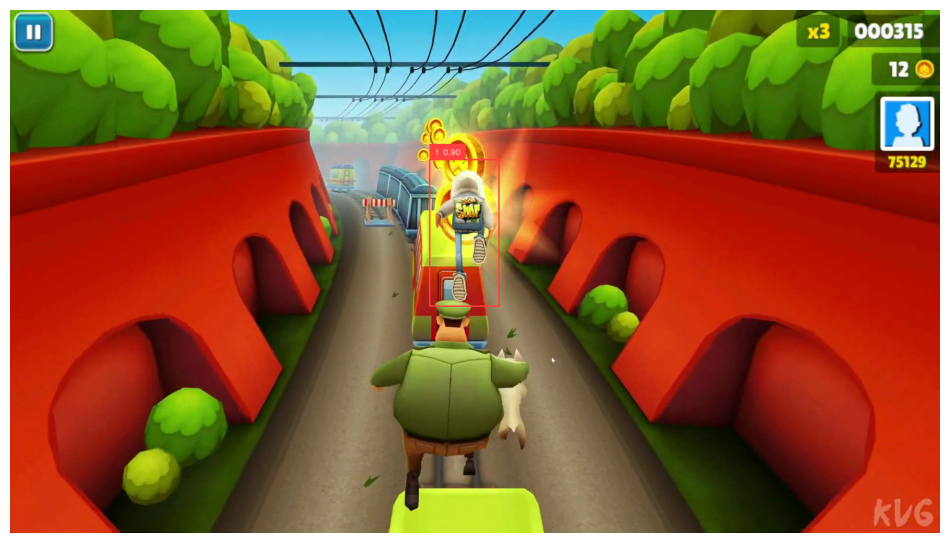

Inference time: 230.40 ms


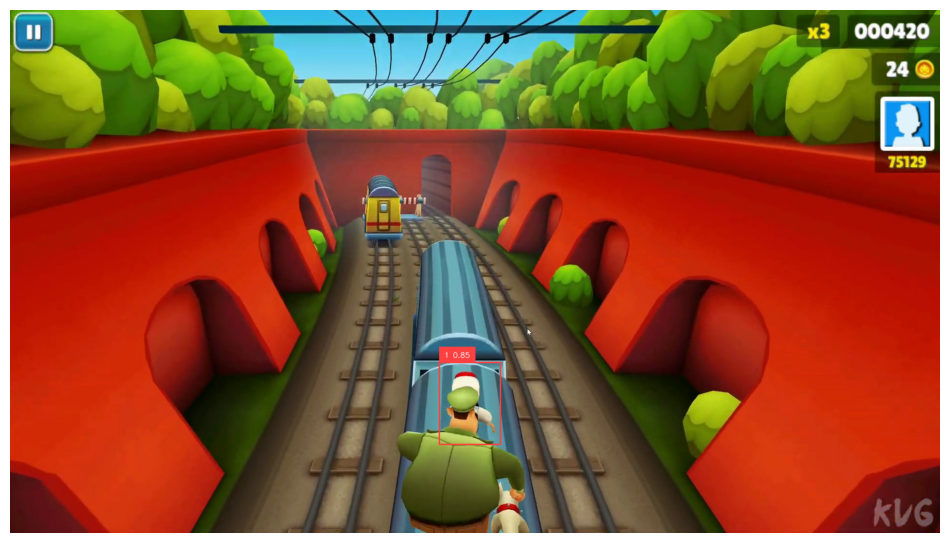

Inference time: 198.17 ms


In [6]:
# Define ONCE at top level
weights_path = os.path.expanduser("~/downloads/weightsjake.pt")
device = "mps" if torch.backends.mps.is_available() else "cpu"
model = RFDETRBase(pretrain_weights=weights_path, num_classes=3)

def cycle2(j, i):
    image_path = os.path.expanduser(f"~/SubwaySurfers/train_screenshots/frame_00{j}{i}.jpg")
    image = Image.open(image_path)#.resize((512, 288))  # optional downscale <------ OPTIONAL DOWNSCALE FOR PERFORMANCE
    

    start = time.time()
    detections = model.predict(image, threshold=0.5, device=device)
    end = time.time()

    annot = sv.BoxAnnotator().annotate(image, detections)
    labels = [f"{cid} {conf:.2f}" for cid, conf in zip(detections.class_id, detections.confidence)]
    annot = sv.LabelAnnotator().annotate(annot, detections, labels)
    sv.plot_image(annot)

    print(f"Inference time: {(end - start) * 1000:.2f} ms")

#Test for ranges
for i in range(5):
    for j in range(1):
        cycle2(j, i)
